In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


2025-09-16 05:26:23.339103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758000383.634433      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758000383.726112      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
detector = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1")


2025-09-16 05:26:51.647701: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
image_path = "/kaggle/input/object-detect/object_detect.jpg"  
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

In [8]:
input_tensor = tf.convert_to_tensor(image_np, dtype=tf.uint8)[tf.newaxis, ...]
detections = detector(input_tensor)

In [9]:
boxes = detections["detection_boxes"].numpy()[0]
scores = detections["detection_scores"].numpy()[0]
classes = detections["detection_classes"].numpy()[0].astype(np.int32)

In [11]:
img_h, img_w, _ = image_np.shape
for box, score, cls in zip(boxes, scores, classes):
    if score < 0.5:
        continue
    ymin, xmin, ymax, xmax = box
    left, top, right, bottom = int(xmin * img_w), int(ymin * img_h), int(xmax * img_w), int(ymax * img_h)
    cv2.rectangle(image_np, (left, top), (right, bottom), (255, 0, 0), 2)

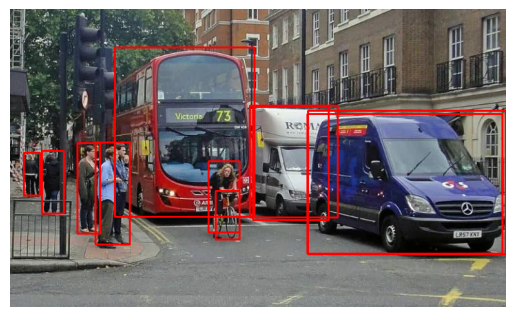

In [12]:
plt.imshow(image_np)
plt.axis("off")
plt.show()